In [4]:
from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./time diff statistics.txt',sep='\t')
cha = pd.to_datetime(df['commit time'])-pd.to_datetime(df['so time'])
df['time diff'] = cha.apply(lambda x: x.days)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367108 entries, 0 to 1367107
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Unnamed: 0   1367108 non-null  object
 1   commit       1367108 non-null  object
 2   commit time  1367108 non-null  object
 3   so time      1367108 non-null  object
 4   time diff    1367108 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 52.2+ MB


In [6]:
df.head(5)

,Unnamed: 0,commit,commit time,so time,time diff
0,F:\CCFinder\NewData\APIJSON\0\203.java,F:\CCFinder\NewData\APIJSON\0\203.java,2016-11-24,2013-02-12,1381
1,F:\CCFinder\NewData\APIJSON\1\509.java,F:\CCFinder\NewData\APIJSON\1\509.java,2017-01-01,2013-02-12,1419
2,F:\CCFinder\NewData\APIJSON\1\2168.java,F:\CCFinder\NewData\APIJSON\1\2168.java,2017-04-03,2013-05-24,1410
3,F:\CCFinder\NewData\APIJSON\1\3563.java,F:\CCFinder\NewData\APIJSON\1\3563.java,2017-05-09,2014-02-18,1176
4,F:\CCFinder\NewData\APIJSON\1\3575.java,F:\CCFinder\NewData\APIJSON\1\3575.java,2017-05-10,2014-02-18,1177


In [9]:
x = df['commit'].iloc[2]
temp_df = df[df['commit']==x]
temp_df



,Unnamed: 0,commit,commit time,so time,time diff
2,F:\CCFinder\NewData\APIJSON\1\2168.java,F:\CCFinder\NewData\APIJSON\1\2168.java,2017-04-03,2013-05-24,1410
12,F:\CCFinder\NewData\APIJSON\1\2168.java,F:\CCFinder\NewData\APIJSON\1\2168.java,2017-04-03,2015-09-19,562
19,F:\CCFinder\NewData\APIJSON\1\2168.java,F:\CCFinder\NewData\APIJSON\1\2168.java,2017-04-03,2016-02-22,406
61,F:\CCFinder\NewData\APIJSON\1\2168.java,F:\CCFinder\NewData\APIJSON\1\2168.java,2017-04-03,2011-08-04,2069
62,F:\CCFinder\NewData\APIJSON\1\2168.java,F:\CCFinder\NewData\APIJSON\1\2168.java,2017-04-03,2012-07-06,1732


In [10]:
len(set(df['commit']))

21622

In [11]:
new_df = pd.DataFrame({'Unnamed: 0':[],'commit':[],
                       'commit time':[],'so time':[],
                       'time diff':[]})
group = df.groupby('commit')
commit_names = set(list(df['commit']))

for commit in tqdm(commit_names):
    temp_df = group.get_group(commit)
    t = temp_df[temp_df['time diff']==temp_df['time diff'].min()]
    t = temp_df.iloc[0]
    # print(len(t))
    new_df = new_df.append(t)
    # break


100%|██████████| 21622/21622 [00:50<00:00, 429.14it/s]


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21622 entries, 217133 to 518830
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   21622 non-null  object 
 1   commit       21622 non-null  object 
 2   commit time  21622 non-null  object 
 3   so time      21622 non-null  object 
 4   time diff    21622 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1013.5+ KB


In [13]:
new_df['time diff'].value_counts()

822.0     91
2988.0    63
698.0     57
2991.0    50
686.0     49
          ..
3409.0     1
3275.0     1
3639.0     1
2158.0     1
2811.0     1
Name: time diff, Length: 3136, dtype: int64

# <font color='red'>distribution of time distance from SO clone

In [14]:
_1year = len(new_df[(new_df['time diff']>=0)&(new_df['time diff']<=365)])
_2year = len(new_df[(new_df['time diff']>365)&(new_df['time diff']<=2*365)])
_3year = len(new_df[(new_df['time diff']>365*2)&(new_df['time diff']<=3*365)])
_4year = len(new_df[(new_df['time diff']>365*3)])

In [15]:
x = new_df['commit time'].apply(lambda x: pd.to_datetime(x).year).to_list()
x = pd.Series(x)
len_x = len(x)
print(x.min(), x.max())

2009 2020


In [16]:
x_2009,x_2010,x_2011,x_2012,x_2013,x_2014 = (x==2009).sum(),(x==2010).sum(),(x==2011).sum(),(x==2012).sum(),(x==2013).sum(),(x==2014).sum()
x_2015,x_2016,x_2017,x_2018,x_2019,x_2020 = (x==2015).sum(),(x==2016).sum(),(x==2017).sum(),(x==2018).sum(),(x==2019).sum(),(x==2020).sum()


### distribution of time from commit SO code reuse pair

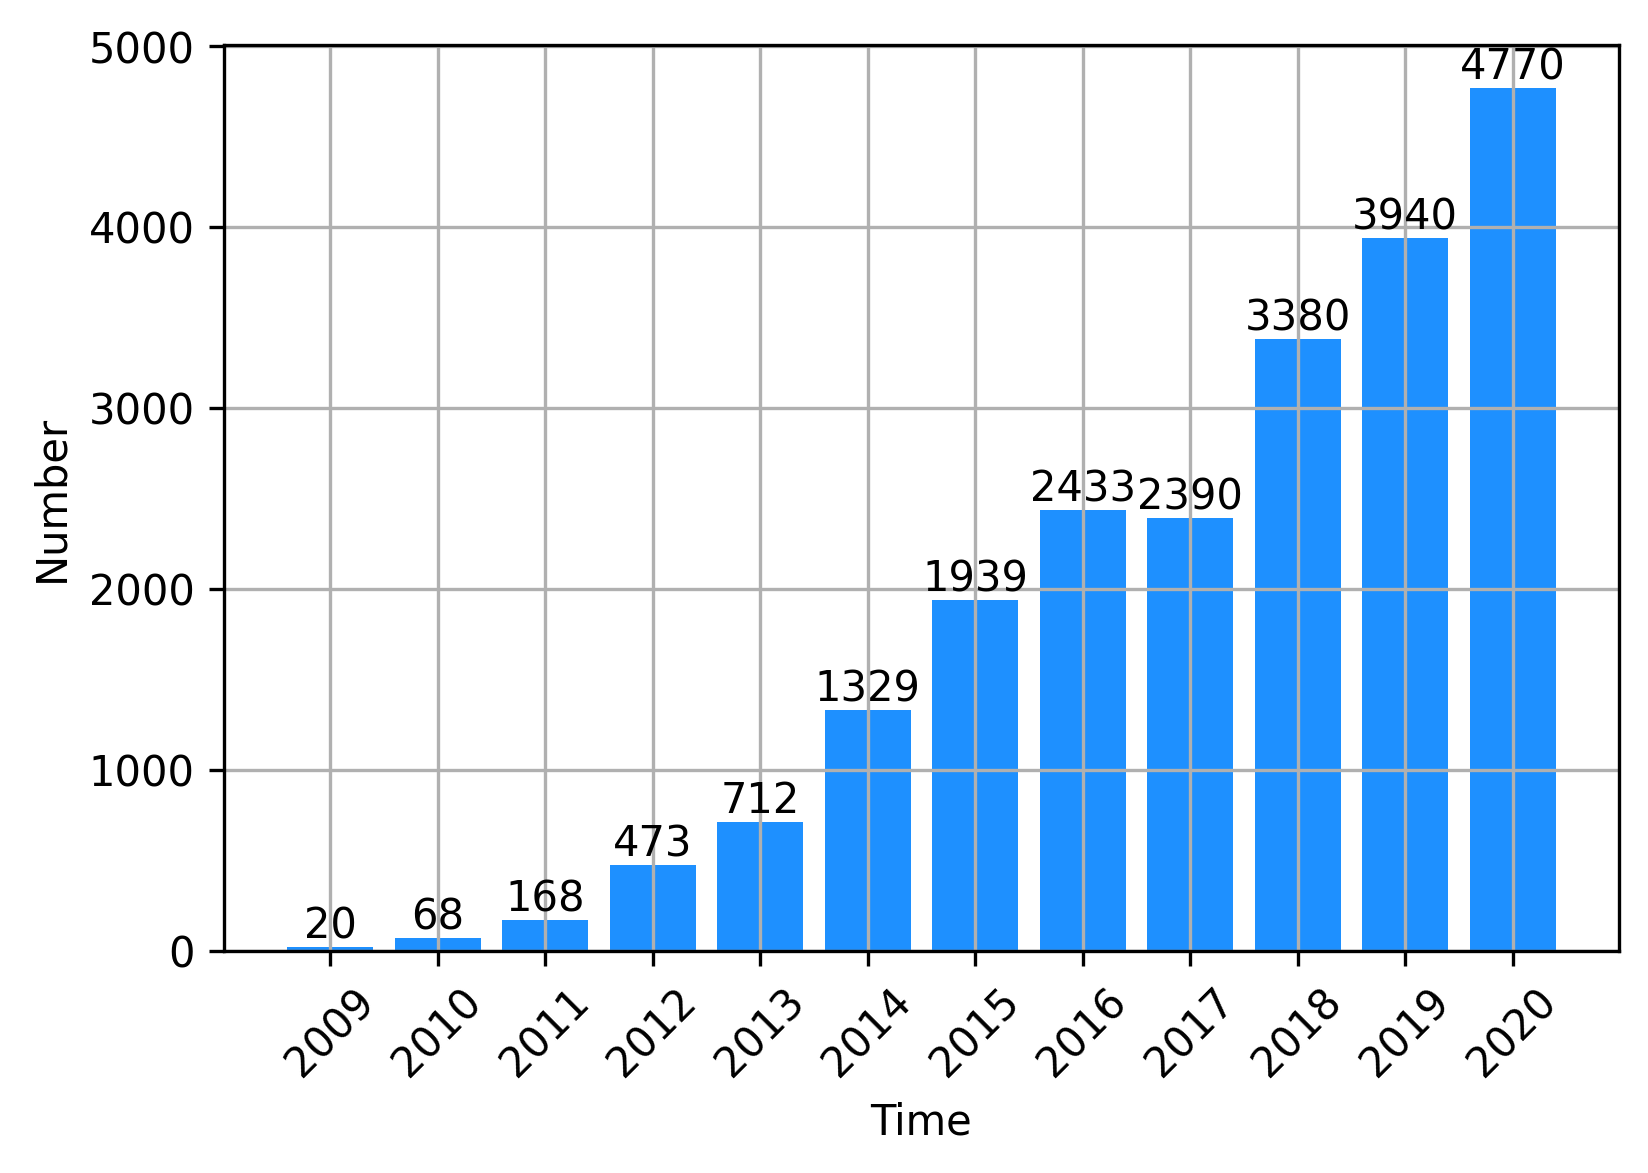

In [17]:
# data
x = [i for i in range(1,13)]
y = [x_2009,x_2010,x_2011,x_2012,x_2013,x_2014,
     x_2015,x_2016,x_2017,x_2018,x_2019,x_2020]
all_year = len_x
plt.figure(dpi=300)
# draw

plt.bar(x,y,align="center",color="#1E90FF",tick_label=[i for i in range(2009,2021)],alpha=1.0)
for a,b,i in zip(x,y,range(len(x))):
    plt.text(a,b+50,str(y[i]),ha='center',fontsize=10)
plt.xlabel("Time")
plt.ylabel("Number")
plt.xticks(rotation=45)
plt.grid()
plt.savefig('./time_diff commit.jpg')



### distribution of time distance from SO code reuse pair

In [18]:
_1year = len(new_df[(new_df['time diff']>=0)&(new_df['time diff']<=365)])
_2year = len(new_df[(new_df['time diff']>365)&(new_df['time diff']<=2*365)])
_3year = len(new_df[(new_df['time diff']>365*2)&(new_df['time diff']<=3*365)])
_4year = len(new_df[(new_df['time diff']>365*3)])

In [19]:
_1year,_2year,_3year,_4year

(2450, 3332, 2904, 12936)

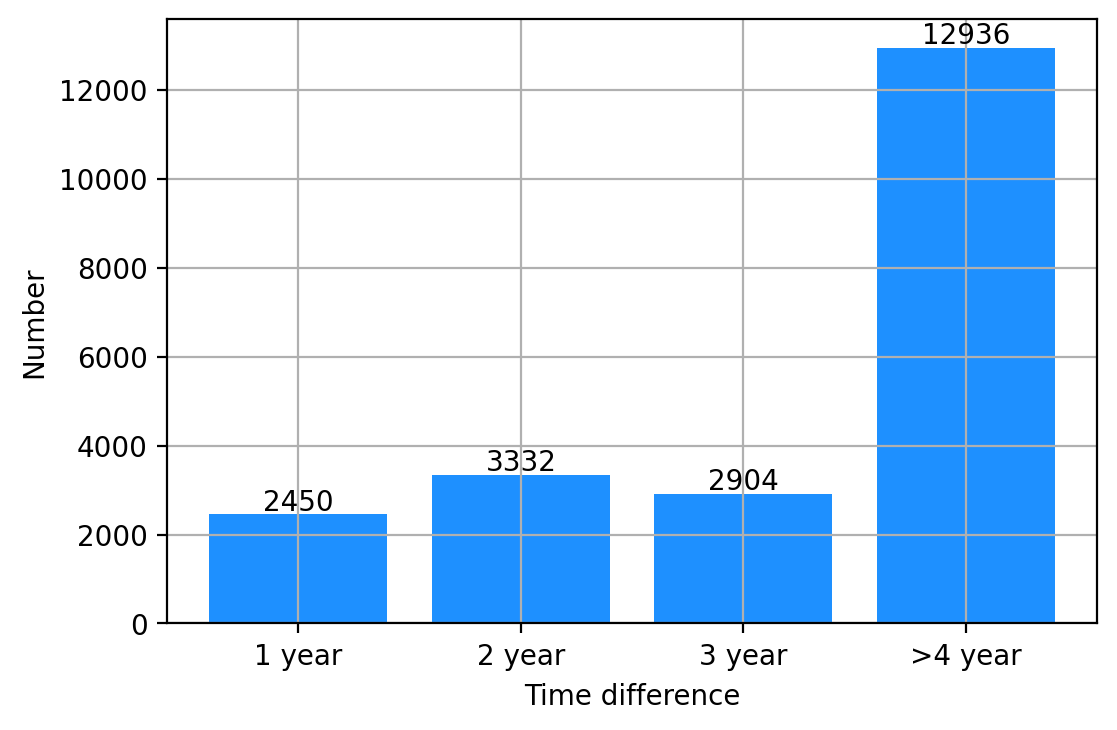

In [20]:
# data
x = [1,2,3,4]
y = [_1year,_2year,_3year,_4year]
all_year = _1year+_2year+_3year+_4year
plt.figure(dpi=200)
# draw

plt.bar(x,y,align="center",color="#1E90FF",tick_label=['1 year', '2 year', '3 year', '>4 year'],alpha=1.0)
for a,b,i in zip(x,y,range(len(x))):
    plt.text(a,b+100,str(y[i]),ha='center',fontsize=10)
plt.xlabel("Time difference")
plt.ylabel("Number")
plt.grid()
plt.savefig('./time_diff（only min）.jpg',bbox_inches = 'tight')



